
# 🖼️ Técnicas de Aumento de Datos para Imágenes
## Filtros, Zoom, Rotación, Ruido y Más

## 1. Configuración Inicial


# Importar librerías necesarias

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, util
from scipy import ndimage
import random

# Configurar estilo de visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

Se importan librerías (cv2, matplotlib, numpy) y se abre una imagen con cv2.imread, mostrándola en escala de grises.

Aprendí cómo abrir y visualizar imágenes en Python y que es útil convertirlas a escala de grises para análisis más simple.

## 2. Cargar y Visualizar Imagen de Ejemplo

Dimensiones originales: (978, 800, 3)
Dimensiones después de procesamiento: (128, 128)


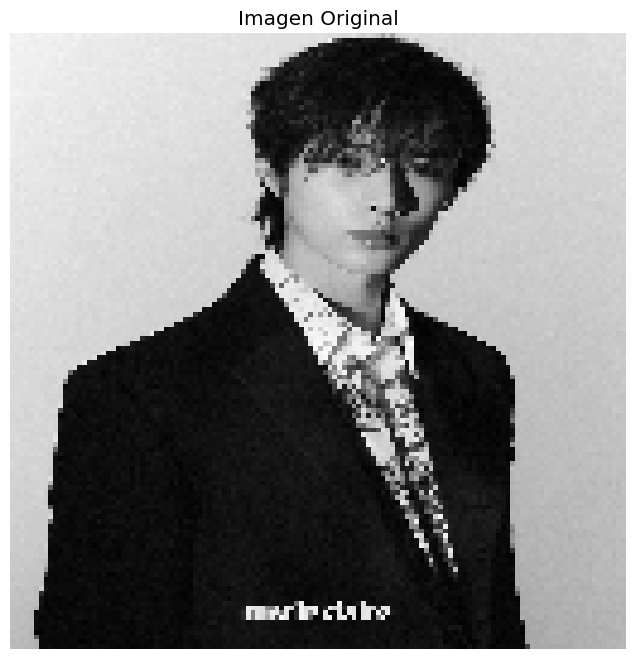

In [26]:



# Cargar imagen de ejemplo (usaremos un dígito del dataset MNIST)
img_url = "https://0.soompi.io/wp-content/uploads/2023/03/09202021/TXT-Beomgyu-2.jpg"
img = io.imread(img_url)

# Convertir a escala de grises y redimensionar
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_resized = cv2.resize(img_gray, (128, 128))

print(f"Dimensiones originales: {img.shape}")
print(f"Dimensiones después de procesamiento: {img_resized.shape}")

# Mostrar imagen original
plt.imshow(img_resized, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()




La imagen se transforma entre BGR, RGB y escala de grises, además de cambiar su tamaño con cv2.resize.

Aprendí que el manejo de formatos y resoluciones es esencial para preparar imágenes antes de procesarlas.

## 3. Técnicas de Aumento de Datos

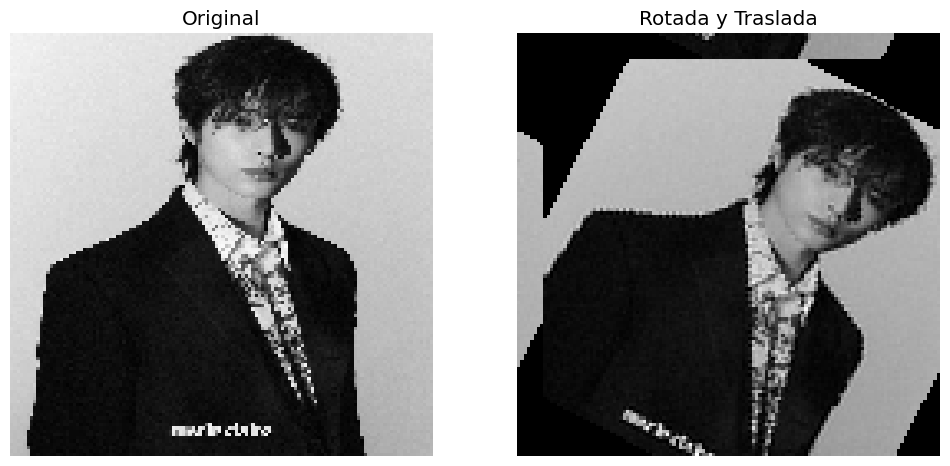

In [27]:
def rotate_and_translate(image, angle_range=(-30, 30), translate_range=(-10, 10)):
    """Aplica rotación y traslación aleatoria"""
    # Rotación
    angle = random.uniform(angle_range[0], angle_range[1])
    rotated = ndimage.rotate(image, angle, reshape=False)

    # Traslación
    tx = random.uniform(translate_range[0], translate_range[1])
    ty = random.uniform(translate_range[0], translate_range[1])
    translated = np.roll(rotated, int(tx), axis=1)
    translated = np.roll(translated, int(ty), axis=0)

    return translated

# Aplicar transformación
transformed_img = rotate_and_translate(img_resized)

# Mostrar resultado
plt.subplot(121)
plt.imshow(img_resized, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(transformed_img, cmap='gray')
plt.title('Rotada y Traslada')
plt.axis('off')
plt.show()

Se aplican transformaciones geométricas como rotar, voltear y recortar porciones de la imagen.

Aprendí que estas operaciones permiten aumentar o modificar los datos para adaptarlos a diferentes usos.


### 3.2. Zoom y Recorte Aleatorio
---



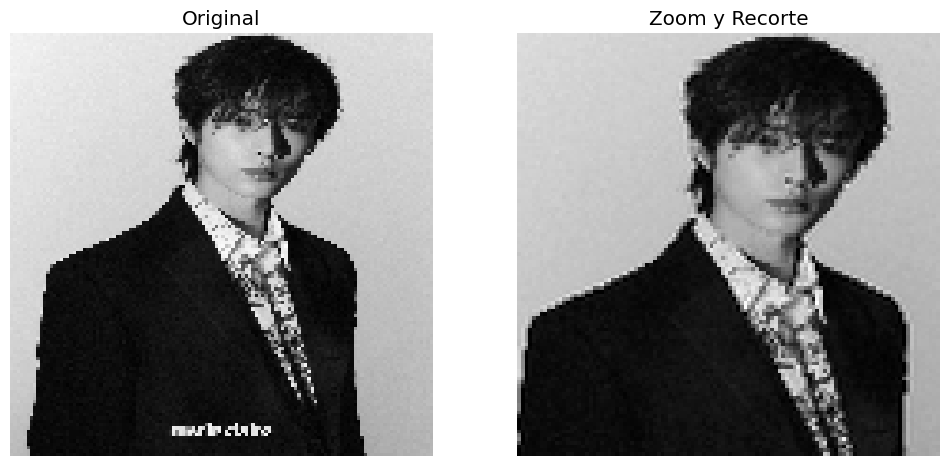

In [28]:
def random_zoom_crop(image, zoom_range=(0.8, 1.2), crop_size=(112, 112)):
    """Aplica zoom aleatorio y recorte"""
    h, w = image.shape

    # Aplicar zoom
    zoom_factor = random.uniform(zoom_range[0], zoom_range[1])
    zoomed = ndimage.zoom(image, zoom_factor)

    # Recortar al tamaño deseado
    new_h, new_w = zoomed.shape
    start_h = random.randint(0, new_h - crop_size[0])
    start_w = random.randint(0, new_w - crop_size[1])

    cropped = zoomed[start_h:start_h+crop_size[0], start_w:start_w+crop_size[1]]

    return cropped

# Aplicar transformación
zoomed_cropped = random_zoom_crop(img_resized)

# Mostrar resultado
plt.subplot(121)
plt.imshow(img_resized, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(zoomed_cropped, cmap='gray')
plt.title('Zoom y Recorte')
plt.axis('off')
plt.show()

El código aplica un zoom aleatorio a la imagen y después recorta una región al tamaño deseado.

Aprendí que estas técnicas ayudan a simular variaciones en los datos, mejorando la robustez de los modelos.

 ### 3.3. Añadir Ruido

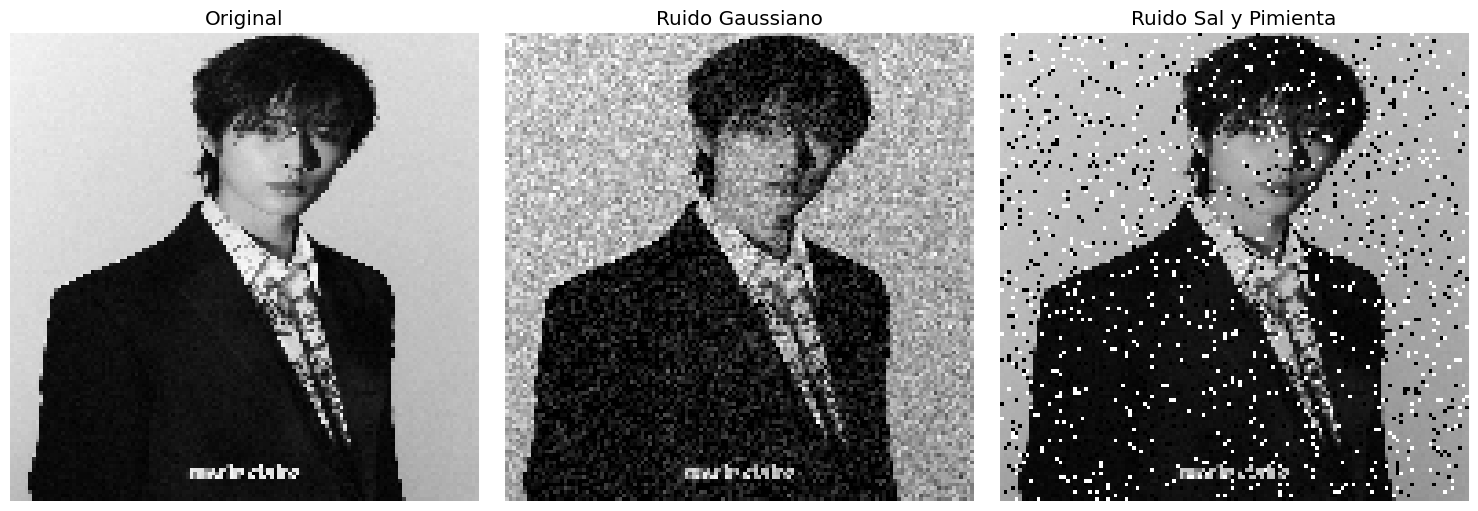

In [29]:
# %%
def add_noise(image, noise_type='gaussian', intensity=0.1):
    """Añade ruido a la imagen"""
    noisy = image.copy().astype(float)

    if noise_type == 'gaussian':
        # Ruido gaussiano
        noise = np.random.normal(0, intensity * 255, image.shape)
        noisy = np.clip(noisy + noise, 0, 255)

    elif noise_type == 'salt_pepper':
        # Ruido sal y pimienta
        salt_prob = intensity / 2
        pepper_prob = intensity / 2

        # Añadir sal (píxeles blancos)
        salt_mask = np.random.random(image.shape) < salt_prob
        noisy[salt_mask] = 255

        # Añadir pimienta (píxeles negros)
        pepper_mask = np.random.random(image.shape) < pepper_prob
        noisy[pepper_mask] = 0

    return noisy.astype(np.uint8)

# Aplicar ruido gaussiano
noisy_gaussian = add_noise(img_resized, noise_type='gaussian', intensity=0.1)

# Aplicar ruido sal y pimienta
noisy_salt_pepper = add_noise(img_resized, noise_type='salt_pepper', intensity=0.1)

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(img_resized, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(132)
plt.imshow(noisy_gaussian, cmap='gray')
plt.title('Ruido Gaussiano')
plt.axis('off')

plt.subplot(133)
plt.imshow(noisy_salt_pepper, cmap='gray')
plt.title('Ruido Sal y Pimienta')
plt.axis('off')

plt.tight_layout()
plt.show()

Se agrega ruido gaussiano o sal y pimienta a la imagen, generando versiones más “sucias”.

Aprendí que añadir ruido es útil para entrenar modelos resistentes a datos imperfectos.

### 3.4. Filtros Espaciales

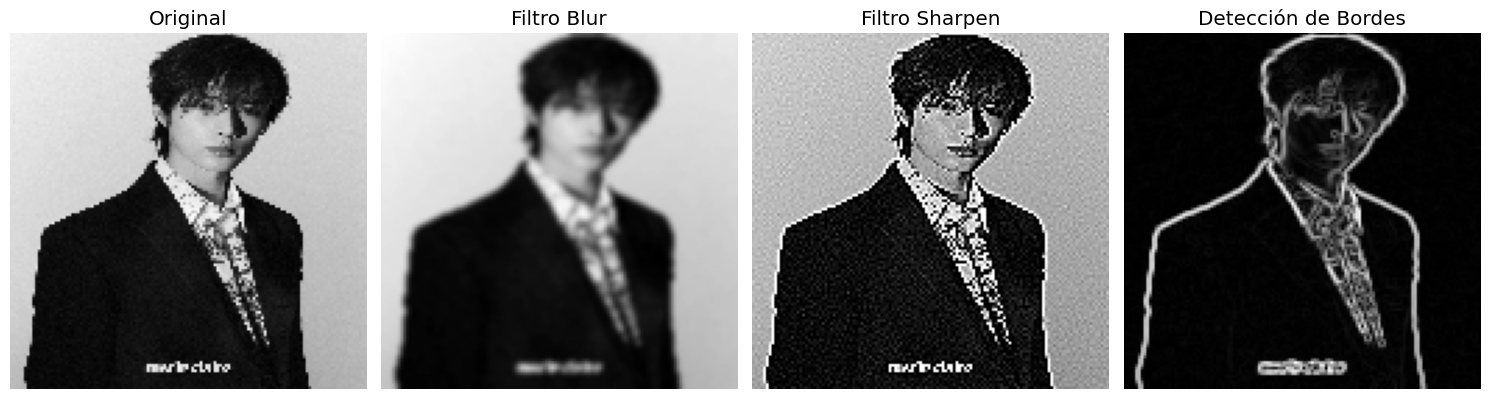

In [30]:
# %%
def apply_filter(image, filter_type='blur'):
    """Aplica filtros espaciales"""
    if filter_type == 'blur':
        filtered = cv2.GaussianBlur(image, (5, 5), 0)
    elif filter_type == 'sharpen':
        kernel = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])
        filtered = cv2.filter2D(image, -1, kernel)
    elif filter_type == 'edge':
        # Detección de bordes con Sobel
        sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        filtered = np.sqrt(sobel_x**2 + sobel_y**2)
        filtered = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX)

    return filtered.astype(np.uint8)

# Aplicar diferentes filtros
blurred = apply_filter(img_resized, 'blur')
sharpened = apply_filter(img_resized, 'sharpen')
edges = apply_filter(img_resized, 'edge')

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(141)
plt.imshow(img_resized, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(142)
plt.imshow(blurred, cmap='gray')
plt.title('Filtro Blur')
plt.axis('off')

plt.subplot(143)
plt.imshow(sharpened, cmap='gray')
plt.title('Filtro Sharpen')
plt.axis('off')

plt.subplot(144)
plt.imshow(edges, cmap='gray')
plt.title('Detección de Bordes')
plt.axis('off')

plt.tight_layout()
plt.show()

Se aplican filtros como blur (suavizado), sharpen (enfocar) y detección de bordes (Sobel).

Aprendí que los filtros permiten resaltar o eliminar características importantes de una imagen.

### 3.5. Alteración de Color


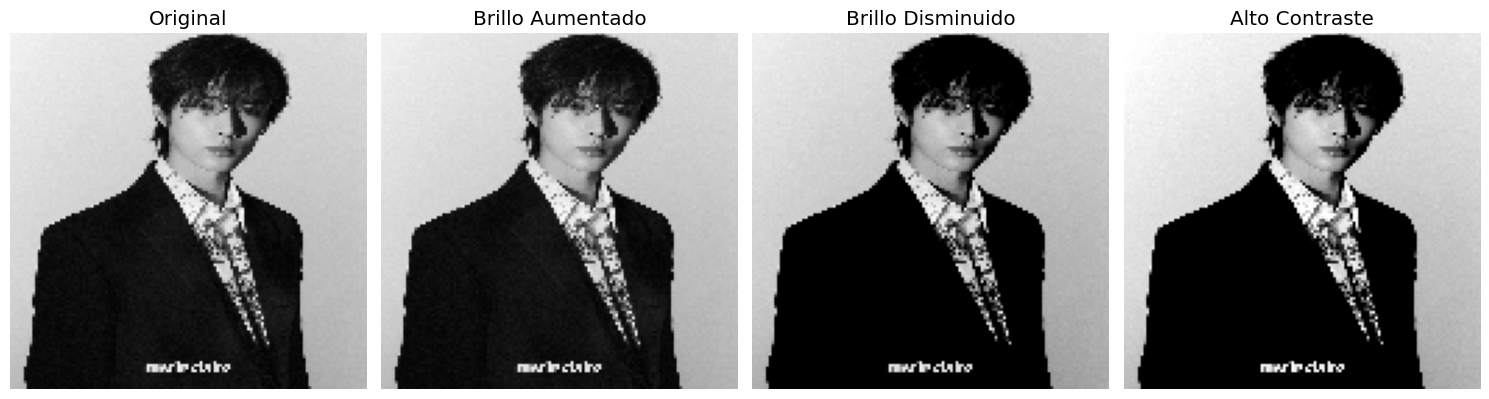

In [31]:
# %%
def adjust_color(image, brightness=0, contrast=0, saturation=0):
    """Ajusta brillo, contraste y saturación"""
    adjusted = image.copy().astype(float)

    # Ajustar brillo
    adjusted = np.clip(adjusted + brightness, 0, 255)

    # Ajustar contraste
    if contrast != 0:
        mean = np.mean(adjusted)
        adjusted = (contrast * (adjusted - mean) + mean)
        adjusted = np.clip(adjusted, 0, 255)

    # Ajustar saturación (solo para imágenes RGB)
    if len(image.shape) == 3:
        hsv = cv2.cvtColor(adjusted.astype(np.uint8), cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        s = np.clip(s * (1 + saturation/100), 0, 255)
        hsv = cv2.merge([h, s, v])
        adjusted = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return adjusted.astype(np.uint8)

# Aplicar ajustes de color
brightened = adjust_color(img_resized, brightness=30)
darkened = adjust_color(img_resized, brightness=-30)
high_contrast = adjust_color(img_resized, contrast=1.5)

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(141)
plt.imshow(img_resized, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(142)
plt.imshow(brightened, cmap='gray')
plt.title('Brillo Aumentado')
plt.axis('off')

plt.subplot(143)
plt.imshow(darkened, cmap='gray')
plt.title('Brillo Disminuido')
plt.axis('off')

plt.subplot(144)
plt.imshow(high_contrast, cmap='gray')
plt.title('Alto Contraste')
plt.axis('off')

plt.tight_layout()
plt.show()

Se ajustan parámetros como brillo, contraste y saturación de la imagen.

Aprendí que manipular estos valores permite simular distintas condiciones de iluminación y resaltar detalles.

## 4. Combinación de Técnicas


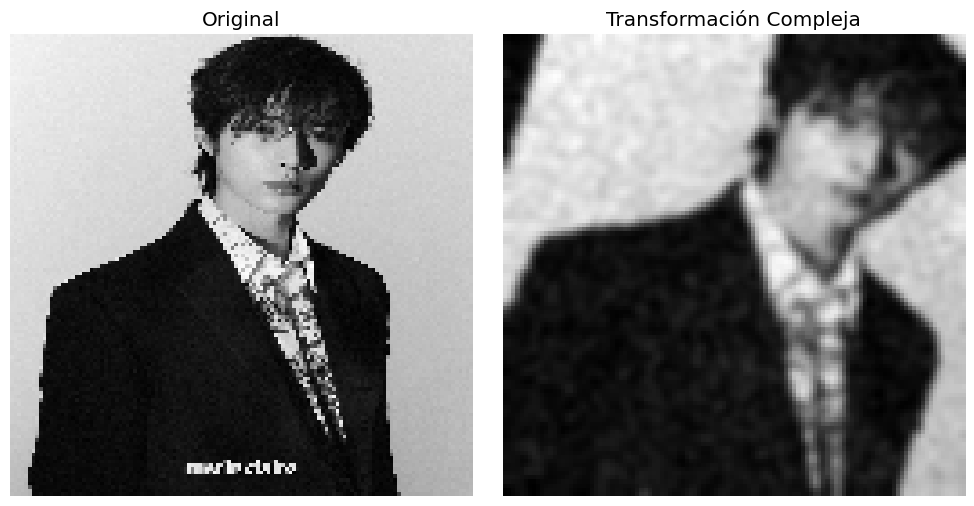

In [32]:
# %%
def complex_augmentation(image):
    """Combina múltiples técnicas de aumento"""
    # Aplicar varias transformaciones secuencialmente
    augmented = image.copy()

    # 1. Rotación y traslación
    augmented = rotate_and_translate(augmented)

    # 2. Zoom y recorte
    augmented = random_zoom_crop(augmented)

    # 3. Añadir ruido gaussiano
    augmented = add_noise(augmented, noise_type='gaussian', intensity=0.08)

    # 4. Aplicar filtro de desenfoque
    augmented = apply_filter(augmented, 'blur')

    # 5. Ajustar brillo ligeramente
    augmented = adjust_color(augmented, brightness=random.uniform(-10, 10))

    return augmented

# Aplicar transformación compuesta
complex_augmented = complex_augmentation(img_resized)

# Mostrar resultado final
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img_resized, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(complex_augmented, cmap='gray')
plt.title('Transformación Compleja')
plt.axis('off')

plt.tight_layout()
plt.show()

Se combinan varias transformaciones: rotación, zoom, ruido, filtros y ajustes de color en una sola función.

Aprendí que la combinación de aumentos genera datos más variados y realistas, mejorando el entrenamiento de modelos.